In [1]:
#Required Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import openpyxl
#%matplotlib inline
#sns.set()
import datetime as dt
import matplotlib.dates
from matplotlib.ticker import NullFormatter
from matplotlib.dates import MonthLocator, DateFormatter
from  matplotlib import *

## PM2.5 .csv file:

In [2]:
file_str = '~/Documents/GitHub/HMEI-2021/winddata_RKPuram.xlsx'
wind_dat = pd.read_excel(file_str, skiprows=16)

In [3]:
wind_dat.index = pd.to_datetime(wind_dat['From Date'], dayfirst=True)

In [4]:
wind_dat = wind_dat.loc[:'2021-07-31', ['WS', 'WD']]

In [5]:
for col in wind_dat.columns:
    wind_dat.loc[:, col] = pd.to_numeric(wind_dat[col], errors='coerce')

In [2]:
#file = '/Users/dishas/Desktop/CPCB_NSIT.csv'
place = 'mumbai'
file_pm = '/Users/dishas/Desktop/missing_data/'+place+'_missing.csv'
df_pm = pd.read_csv(file_pm)

print (df_pm.head())
print (len(df_pm.axes[0]))

print (len(df_pm.axes[1]))

print (df_pm.describe())
print (df_pm.dtypes)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dishas/Desktop/missing_data/mumbai_missing.csv'

In [3]:
#Parsing date as datetime and reading value column as float
df_pm.Date = pd.to_datetime(df_pm.Date,errors='coerce')
df_pm.value = pd.to_numeric(df_pm.value,errors='coerce' )



NameError: name 'df_pm' is not defined

In [4]:
df_pm.set_index('Date', inplace = True)
dfsorted=df_pm.sort_index() ## sorting by date - ascending order
print(dfsorted.head(20))
df_month_new = dfsorted.resample('m').agg({'value': 'mean'})

print (df_month_new)

print (len(df_month_new))

NameError: name 'df_pm' is not defined

## Wind data:

In [5]:
file_wd = '/Users/dishas/Desktop/missing_data/'+place+'_met.csv'

df_wd = pd.read_csv(file_wd)


print (len(df_wd.axes[0]))

print (len(df_wd.axes[1]))

print (df_wd.info())


## formatting dates in wind data
from datetime import datetime

df_wd['Date'] = pd.to_datetime(df_wd['Date'].astype(str),format='%Y%m%d%H%M%S', errors='coerce' )

df_wd.value = pd.to_numeric(df_wd.dir,errors='coerce' )
df_wd.value = pd.to_numeric(df_wd.speed,errors='coerce' )

print (df_wd.head())







FileNotFoundError: [Errno 2] No such file or directory: '/Users/dishas/Desktop/missing_data/mumbai_met.csv'

In [7]:
## QA/QC


#***********************************
print (len(df_pm.axes[0]))
print (len(df_pm.axes[1]))
df_pm = df_pm[df_pm['value'] >= 0]
df_pm = df_pm[df_pm['value'] < 999]
#df_pm['value'] = df_pm['value'].replace(np.nan, 0)
df_pm['value'] = df_pm['value'].fillna(0, inplace=True)

print (df_pm.head())



#***********************************
df_pm = df_pm[df_pm['value'] >= 0]
df_pm = df_pm[df_pm['value'] < 999]
df_pm['value'] = df_pm['value'].replace(np.nan, 0)
df_pm.set_index('Date', inplace = True)
#print (df_pm.head())

#Important to sort date before resampling

dfsorted=df_pm.sort_index()
print(dfsorted.head(20))

df_month_new = dfsorted.resample('m').agg({'value': 'mean'})

print (df_month_new)

print (len(df_month_new))

NameError: name 'df_pm' is not defined

In [8]:
#Considering only positive values and leaving outliers
df_pm = df_pm[df_pm['value'] >= 0]
df_pm = df_pm[df_pm['value'] < 999]

df_pm.set_index('Date', inplace = True)
print (df_pm.head())

#Important to sort date before resampling

dfsorted=df_pm.sort_index()
print(dfsorted.head(20))

df_hour = dfsorted['value'].resample('h').apply(lambda x: x.mean() if x.count()>1 else np.nan)

df_hour_fix = df_hour[df_hour != np.nan] #considering only the non na values 

#base 0 means starting at 00 hours
df_twelvehour = df_hour_fix.resample('12h', base = 0).apply(lambda x: x.mean() if x.count()>1 else np.nan) 

df_twelvehour_fix = df_twelvehour[df_twelvehour != np.nan]

df_day = df_twelvehour_fix.resample('d').apply(lambda x: x.mean() if x.count()>1 else np.nan)

print (df_twelvehour_fix)
print (df_day)
print (df_day.max())

print (df_day.isna().sum()) #total number of non permissible values

df_day_fix = df_day[df_day != np.nan]

df_month = df_day_fix.resample('m').apply(lambda x: x.mean() if x.count()>8 else np.nan)

print (df_month)
print (df_month.isna().sum())

df_month_fix = df_month[df_month != np.nan]

df_month_pm = df_month_fix.to_frame()

print ('final pm dataframe')
print (df_month_pm)

df_month_new = dfsorted.resample('m').agg({'value': 'mean'})

print (df_month_new)

print (len(df_month_new))

NameError: name 'df_pm' is not defined

In [9]:
print (len(df_month_wd))
print (len(df_month_pm))

df_fn = pd.merge(df_month_wd, df_month_pm, on=df_month_wd.index, how='outer')



#df_fn = df_fn[df_fn !=np.nan]

df_fn.dropna()

NameError: name 'df_month_wd' is not defined

## Pollution rose plot:

In [7]:
file_path = '~/Documents/GitHub/HMEI-2021/station_data/data_RKPuram.csv'
df_rk = pd.read_csv(file_path)

In [8]:
df_rk.index = pd.to_datetime(df_rk['From Date'])

In [9]:
df_rk = df_rk.drop(columns=['From Date'])

In [10]:
df_rk = df_rk.resample('D').mean()

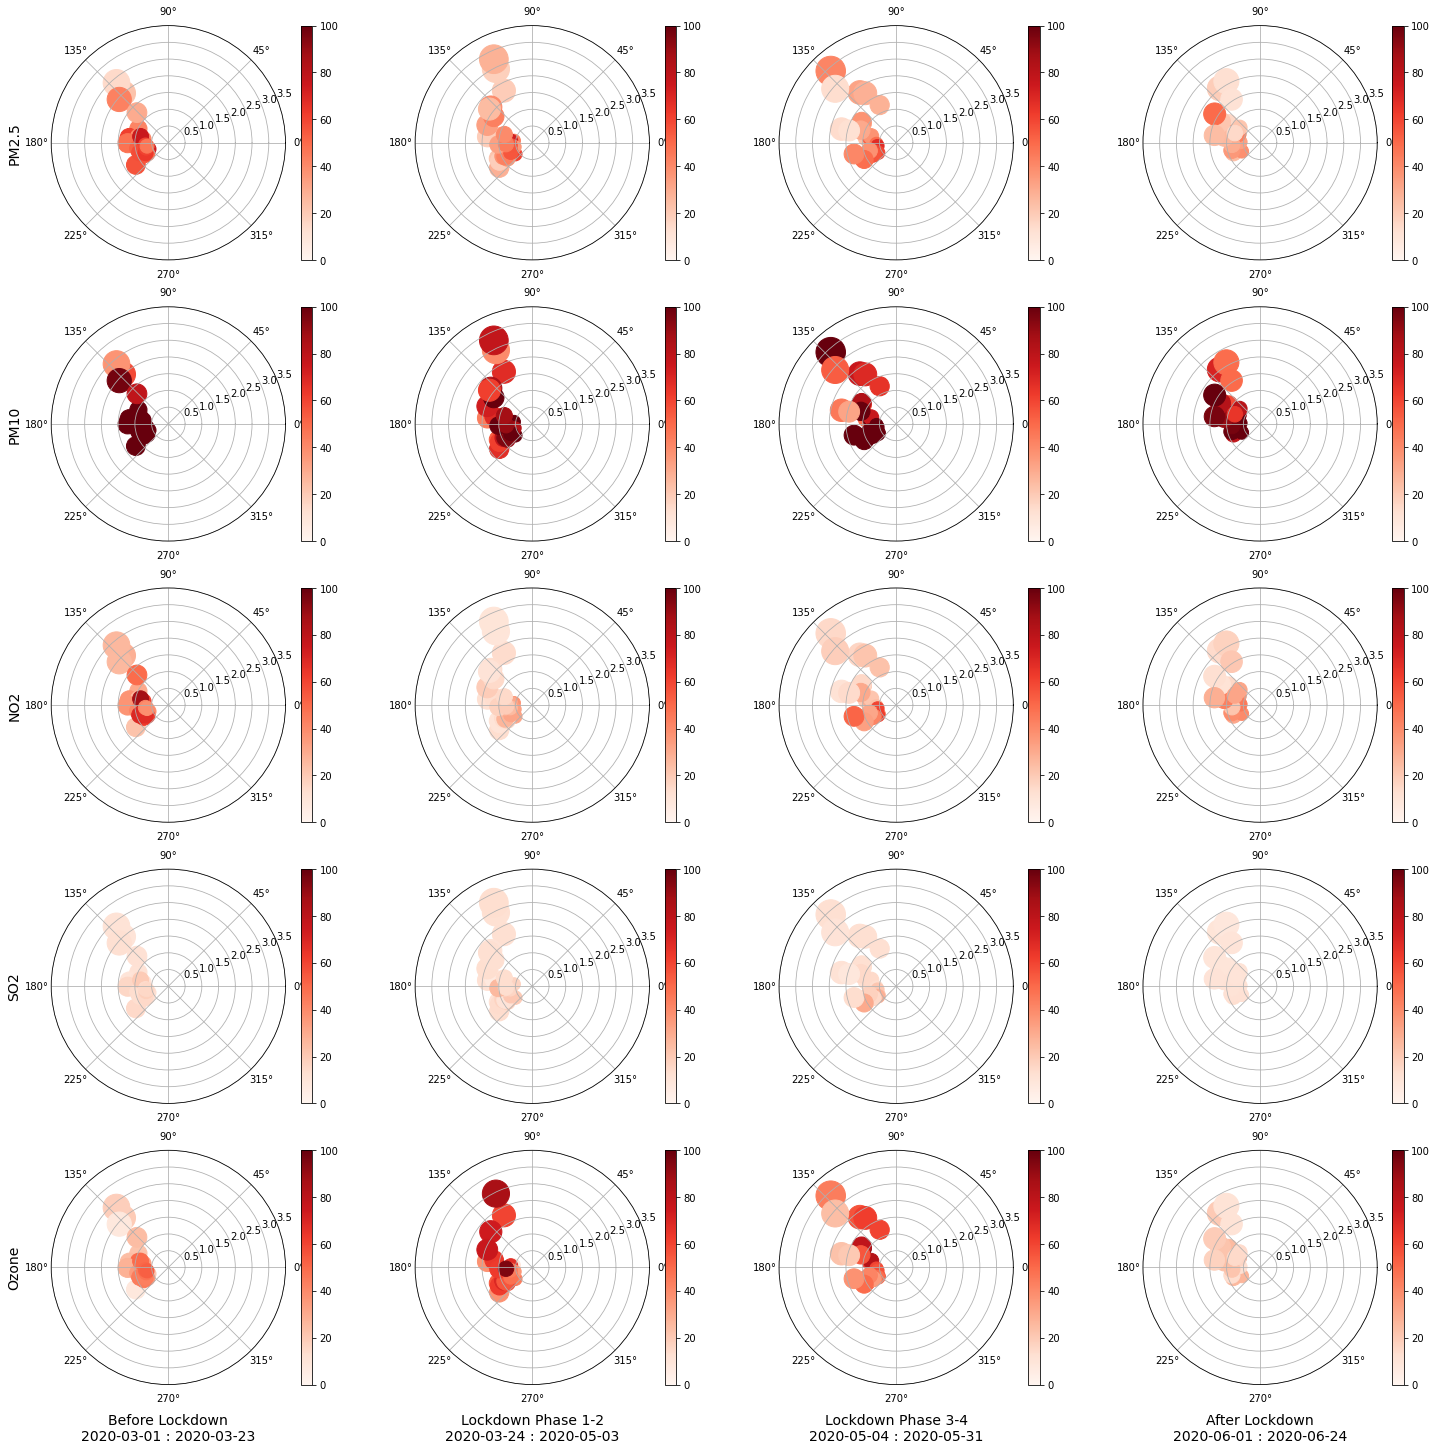

In [11]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'Ozone']
fig = plt.figure(figsize=(25, 25))
dates = [('2020-03-01', '2020-03-23'), ('2020-03-24', '2020-05-03'), 
         ('2020-05-04', '2020-05-31'), ('2020-06-01', '2020-06-24')]
date_labs = ['Before Lockdown\n', 'Lockdown Phase 1-2\n', 'Lockdown Phase 3-4\n', 'After Lockdown\n']

ax_num = 1
for pollutant in pollutants:
    for start_date, end_date in dates:
        dat = wind_dat.resample('D').mean()
        dat = dat.loc[start_date:end_date]
        theta = np.radians(dat['WD'])
        r = dat['WS']
        area = 300 * r
        colors = df_rk.loc[start_date:end_date, pollutant]

        ax = fig.add_subplot(5, 4, ax_num, projection='polar')
        pol_rose = ax.scatter(theta, r, c=colors, s=area, cmap='Reds')

        plt.colorbar(pol_rose)
        pol_rose.set_clim(0, 100)
        ax.set_ylim(0, 3.5)
        
        if ax_num % 4 == 1:
            ax.set_ylabel(pollutant, labelpad=30, fontsize=14)
        if ax_num / 4 > 4:
            label_str = date_labs[(ax_num-1) % 4]
            label_str += (start_date+' : '+end_date)
            ax.set_xlabel(label_str, labelpad=10, fontsize=14)
        
        ax_num += 1
        
plt.savefig('PolRoses_2020_CompleteLD.png')

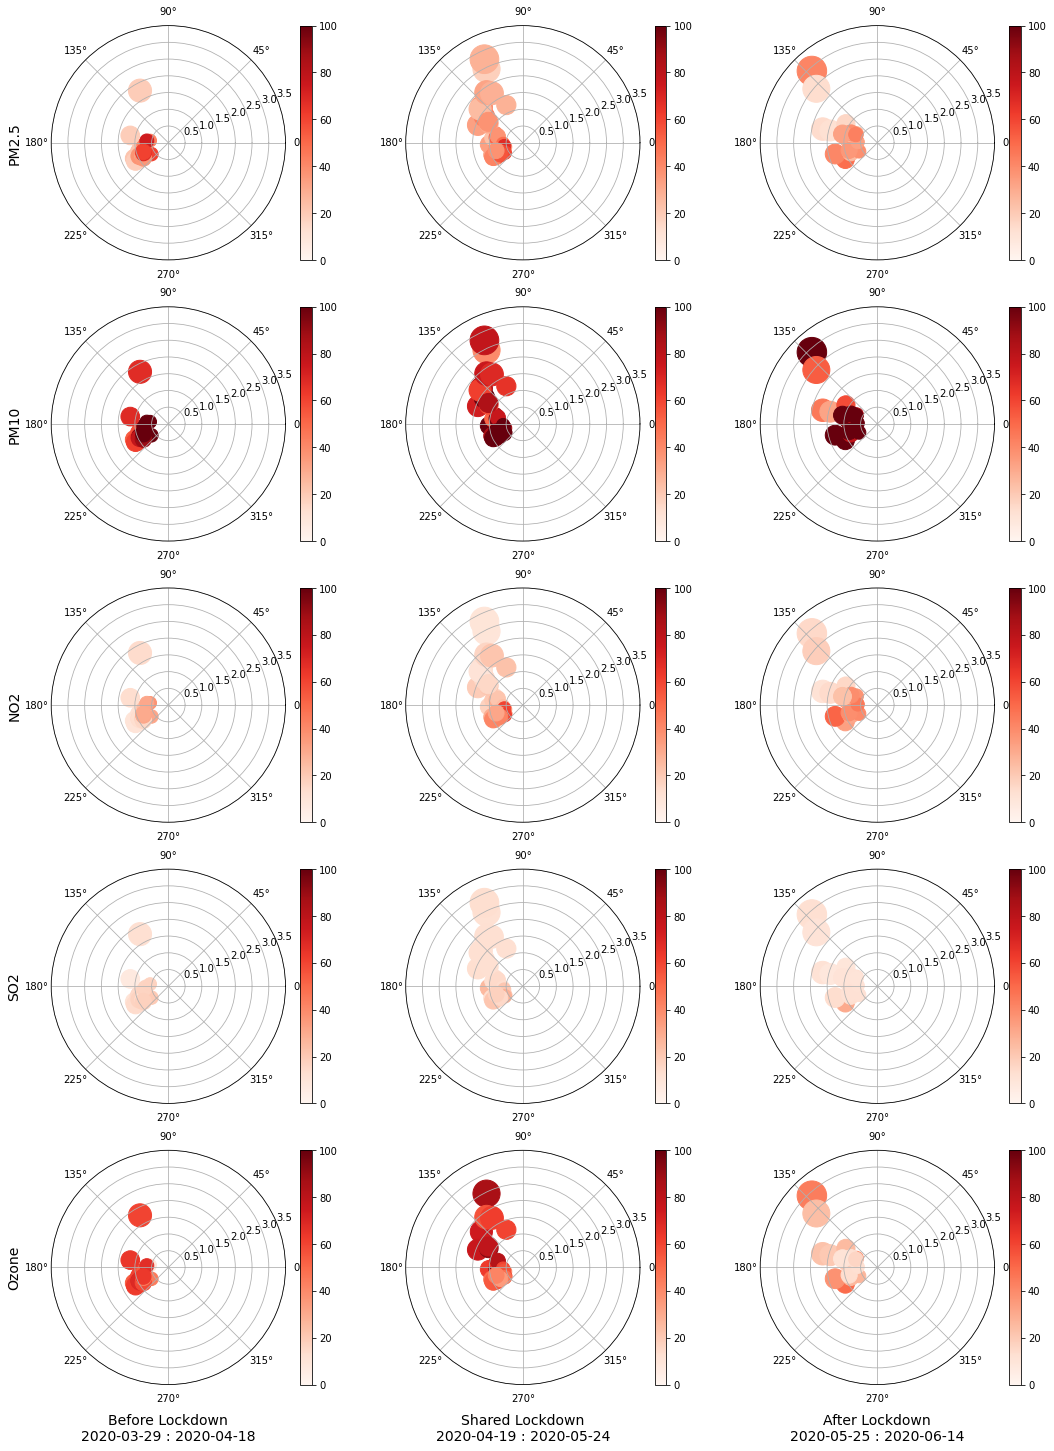

In [12]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'Ozone']
fig = plt.figure(figsize=(18, 25))
dates = [('2020-03-29', '2020-04-18'), ('2020-04-19', '2020-05-24'), 
         ('2020-05-25', '2020-06-14')]
date_labs = ['Before Lockdown\n', 'Shared Lockdown\n', 'After Lockdown\n']

ax_num = 1
for pollutant in pollutants:
    for start_date, end_date in dates:
        dat = wind_dat.resample('D').mean()
        dat = dat.loc[start_date:end_date]
        theta = np.radians(dat['WD'])
        r = dat['WS']
        area = 300 * r
        colors = df_rk.loc[start_date:end_date, pollutant]

        ax = fig.add_subplot(5, 3, ax_num, projection='polar')
        pol_rose = ax.scatter(theta, r, c=colors, s=area, cmap='Reds')

        plt.colorbar(pol_rose)
        pol_rose.set_clim(0, 100)
        ax.set_ylim(0, 3.5)
        
        if ax_num % 3 == 1:
            ax.set_ylabel(pollutant, labelpad=30, fontsize=14)
        if ax_num / 3 > 4:
            label_str = date_labs[(ax_num-1) % 3]
            label_str += (start_date+' : '+end_date)
            ax.set_xlabel(label_str, labelpad=10, fontsize=14)
        
        ax_num += 1
        
plt.savefig('PolRoses_2020_SharedLD.png')

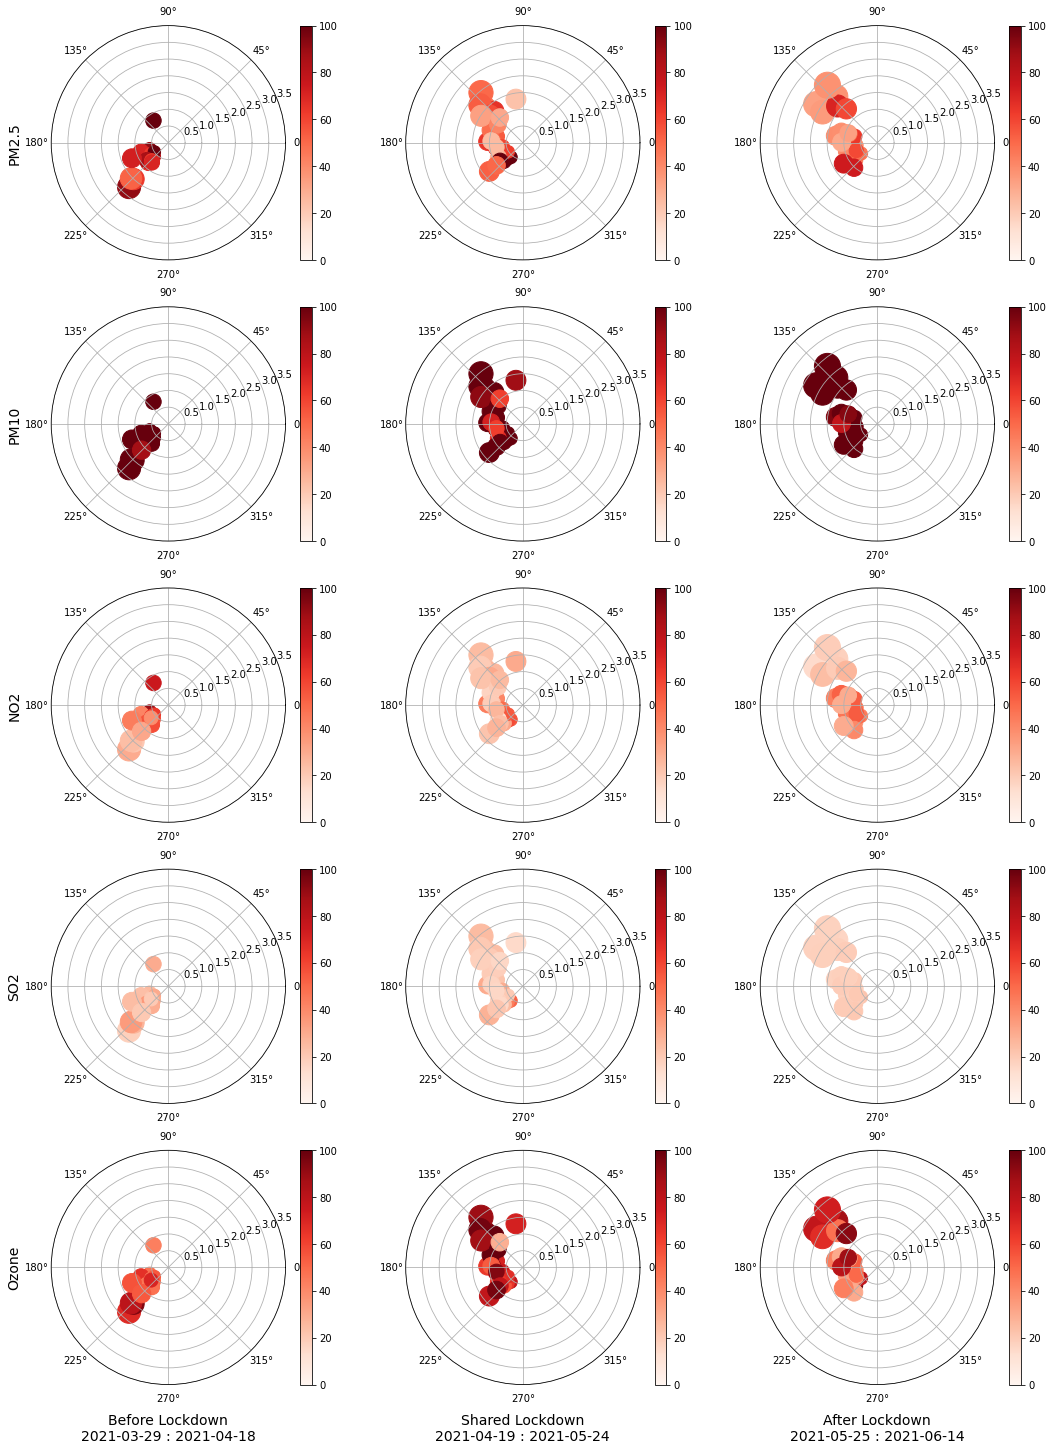

In [13]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'Ozone']
fig = plt.figure(figsize=(18, 25))
dates = [('2021-03-29', '2021-04-18'), ('2021-04-19', '2021-05-24'), 
         ('2021-05-25', '2021-06-14')]
date_labs = ['Before Lockdown\n', 'Shared Lockdown\n', 'After Lockdown\n']

ax_num = 1
for pollutant in pollutants:
    for start_date, end_date in dates:
        dat = wind_dat.resample('D').mean()
        dat = dat.loc[start_date:end_date]
        theta = np.radians(dat['WD'])
        r = dat['WS']
        area = 300 * r
        colors = df_rk.loc[start_date:end_date, pollutant]

        ax = fig.add_subplot(5, 3, ax_num, projection='polar')
        pol_rose = ax.scatter(theta, r, c=colors, s=area, cmap='Reds')

        plt.colorbar(pol_rose)
        pol_rose.set_clim(0, 100)
        ax.set_ylim(0, 3.5)
        
        if ax_num % 3 == 1:
            ax.set_ylabel(pollutant, labelpad=30, fontsize=14)
        if ax_num / 3 > 4:
            label_str = date_labs[(ax_num-1) % 3]
            label_str += (start_date+' : '+end_date)
            ax.set_xlabel(label_str, labelpad=10, fontsize=14)
        
        ax_num += 1
        
plt.savefig('PolRoses_2021_SharedLD.png')

In [117]:
def makePolRose(start_date, end_date):
    dat = wind_dat.resample('D').mean()
    dat = dat.loc[start_date:end_date]
    theta = np.radians(dat['WD'])
    r = dat['WS']
    area = 300 * r
    colors = df_rk.loc[start_date:end_date, 'PM2.5']

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='polar')
    pol_rose = ax.scatter(theta, r, c=colors, s=area, cmap='Reds')

    plt.colorbar(pol_rose)
    pol_rose.set_clim(0, 100)
    ax.set_ylim(0, 3.5)

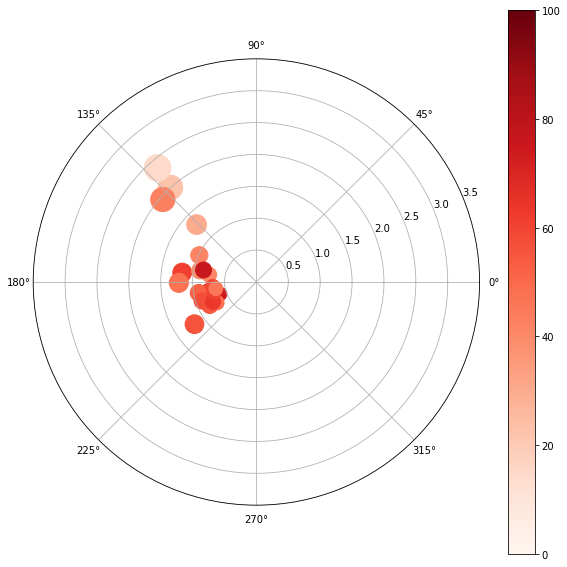

In [118]:
makePolRose('2020-03-01', '2020-03-23')

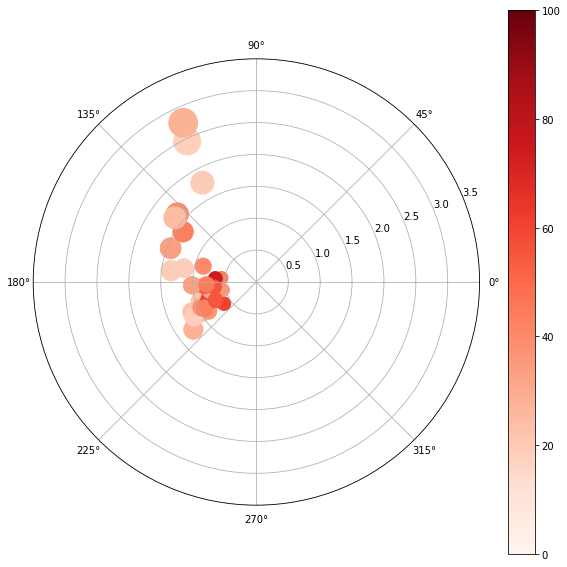

In [119]:
makePolRose('2020-03-24', '2020-05-03')

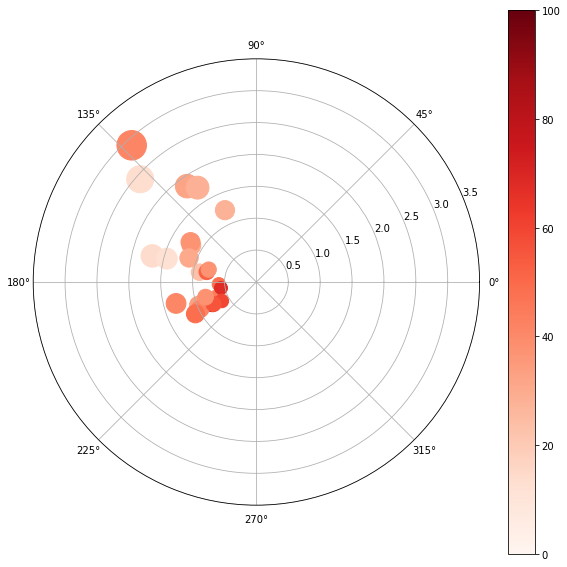

In [120]:
makePolRose('2020-05-04', '2020-05-31')

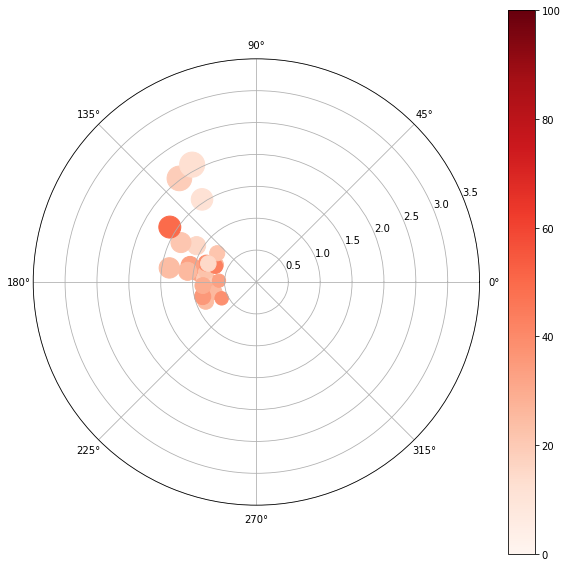

In [121]:
makePolRose('2020-06-01', '2020-06-24')

In [ ]:
start_date

dat = wind_dat.loc['2020-03-24':'2020-05-03']
dat = dat.resample('D').mean()
theta = np.radians(dat['WD'])
r = dat['WS']
area = 100 * r
colors = df_rk.loc['2020-03-24':'2020-05-03', 'PM2.5']

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='Reds')

plt.colorbar(c)
c.set_clim(50, 160)

ax.set_ylim(0, 2.5) # radius limits

(0.0, 2.5)

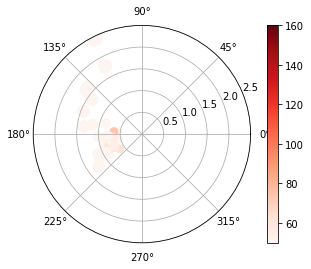

In [75]:
dat = wind_dat.loc['2020-03-24':'2020-05-03']
dat = dat.resample('D').mean()
theta = np.radians(dat['WD'])
r = dat['WS']
area = 100 * r
colors = df_rk.loc['2020-03-24':'2020-05-03', 'PM2.5']

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='Reds')

plt.colorbar(c)
c.set_clim(50, 160)

ax.set_ylim(0, 2.5) # radius limits

(0.0, 2.5)

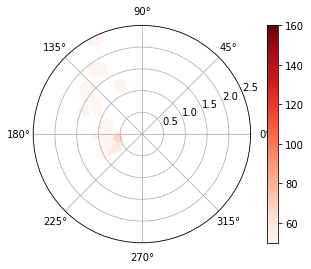

In [74]:
dat = wind_dat.loc['2020-04-19':'2020-05-24']
dat = dat.resample('D').mean()
theta = np.radians(dat['WD'])
r = dat['WS']
area = 100 * r
colors = df_rk.loc['2020-04-19':'2020-05-24', 'PM2.5']

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='Reds')

plt.colorbar(c)
c.set_clim(50, 160)

ax.set_ylim(0, 2.5) # radius limits

(0.0, 2.5)

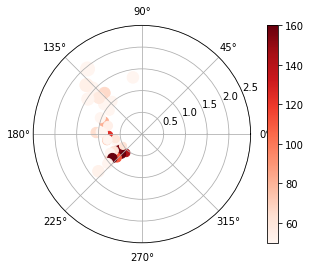

In [71]:
dat = wind_dat.loc['2021-04-19':'2021-05-24']
dat = dat.resample('D').mean()
theta = np.radians(dat['WD'])
r = dat['WS']
area = 100 * r
colors = df_rk.loc['2021-04-19':'2021-05-24', 'PM2.5']

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='Reds')

plt.colorbar(c)
c.set_clim(50, 160)

ax.set_ylim(0, 2.5) # radius limits

In [10]:
import math 
#Polar scatter:

df_fn = df_fn[df_fn['dir'] < 999]
maths = df_fn['dir']
theta = np.radians(maths)
print (df_fn)



# Compute areas and colors

## monthly means:

r = df_fn['speed']

print ('maxspeed = ', r.max(), len(r), len(theta))
theta = theta
#area = df_fn['value']
area = 300*r
#area = df_fn['value']
colors = df_fn['value']

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='Reds', alpha=0.45)

plt.colorbar(c)
c.set_clim(50,160)

ax.set_ylim(0,5) #radius limits
#ax.set_yticks(np.linespace(0,5,0.5))
#plt.title('pollution rose')

plt.savefig(place+'.pdf')

NameError: name 'df_fn' is not defined